In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from cycler import cycler

# GP

In [2]:
class RBF():
    def __init__(self, sigma0, sigmasquared):
        self.sigma0 = sigma0
        self.sigmasquared = sigmasquared

    def r_squared(self, obs, obsprime):
        mgx, mgy = np.meshgrid(obs, obsprime)
        return (mgx - mgy) **2 / self.sigmasquared

    def k(self, obs, obsprime=None):
        if obsprime is None:
            return_mat = self.sigma0 * np.exp(-0.5 * self.r_squared(obs, obs))
            n = len(obs)
            return return_mat + (10 ** -10 * np.eye(n))
        return self.sigma0 * np.exp(-0.5 * self.r_squared(obs, obsprime))

In [3]:
rbf = RBF(1,1)

In [4]:
means = [0,0]
covariance = rbf.k([1,2])

In [5]:
covariance

array([[1.        , 0.60653066],
       [0.60653066, 1.        ]])

In [6]:
rng = np.random.default_rng()
samples = rng.multivariate_normal(means, covariance, 100)

In [7]:
highlight_points =  rng.multivariate_normal(means, covariance, 5)

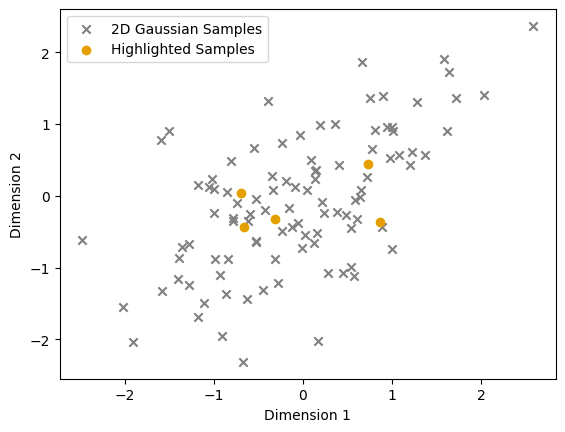

In [8]:
fig, ax = plt.subplots()
ax.scatter(*zip(*samples), color='grey', marker='x', label="2D Gaussian Samples")
ax.scatter(*zip(*highlight_points), color='#E69F00', label="Highlighted Samples")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.legend()

plt.savefig("gaussian_samples_2d_scatter.png")
plt.show()

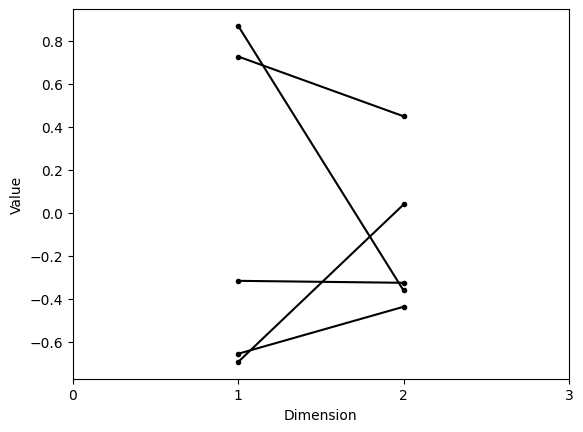

In [9]:
x = [1,2]
fig, ax = plt.subplots()

for p in highlight_points:
    ax.plot(x, p, color='black', marker='.')

plt.xlabel("Dimension")
plt.xticks([0,1,2,3])
plt.ylabel("Value")
plt.savefig("gaussian_samples_2d_line.png")
plt.show()

In [10]:
from cycler import cycler
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
line_sample_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]))

In [15]:
def make_sample_plot(num_dimensions, num_samples, cov_function, savename=None):
    x = range(num_dimensions)
    
    if cov_function == 'identity':
        covariance = 10 * np.eye(num_dimensions)
    elif cov_function == 'ones':
        covariance = 0.1 * np.ones((num_dimensions, num_dimensions))
    else:
        covariance = cov_function(x)

    rng = np.random.default_rng()
    samples = rng.multivariate_normal([0] * num_dimensions, covariance, num_samples)
    
    fig, ax = plt.subplots()
    # plt.rc("axes", prop_cycle=line_sample_cycler)   
    
    for p in samples:
        ax.plot(x, p, color='black')

    plt.xlabel("Dimension")
    # plt.xticks(x)
    plt.ylabel("Value")
    if savename:
        plt.savefig(savename)
    plt.show()
    

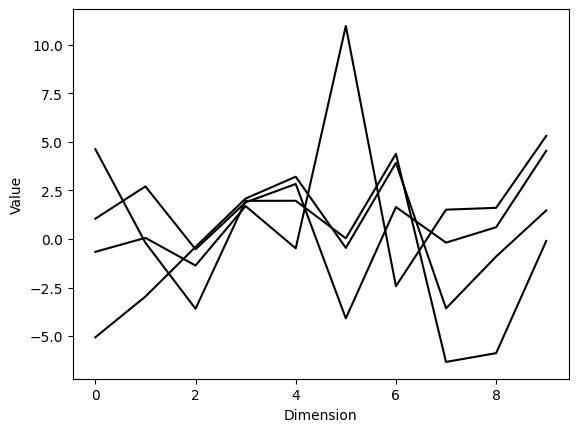

In [195]:
make_sample_plot(10,4,'identity', savename='identity10line.png')

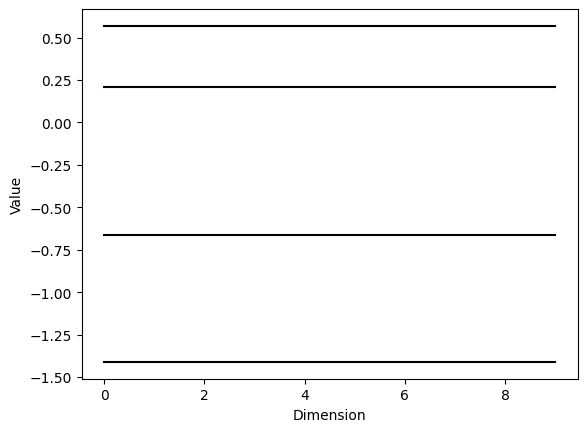

In [196]:
make_sample_plot(10, 4,'ones', savename='ones10line.png')

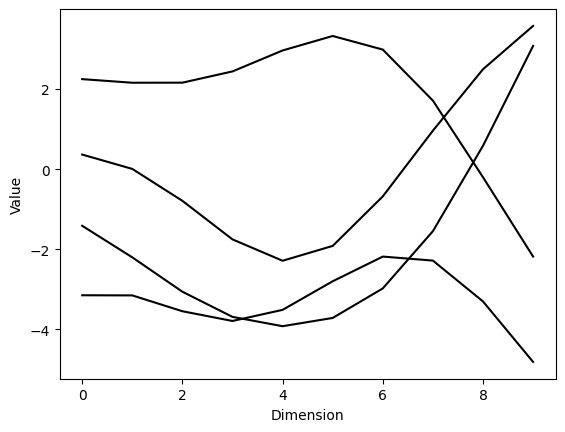

In [197]:
make_sample_plot(10,4,RBF(10,10).k, savename='rbf10line.png')

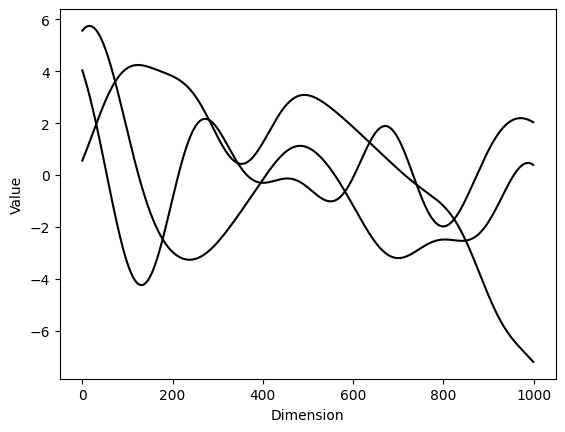

In [21]:
make_sample_plot(1000,3,RBF(10,10000).k, savename='rbf1000line.png')

In [13]:
def make_covariance_heatmap(num_dimensions, cov_function, savename=None):

    x = range(num_dimensions)
    
    if cov_function == 'identity':
        covariance = 10 * np.eye(num_dimensions)
    elif cov_function == 'ones':
        covariance = 0.1 * np.ones((num_dimensions, num_dimensions))
    else:
        covariance = cov_function(x)

    fig, ax = plt.subplots()

    im = ax.imshow(covariance, cmap="viridis", vmin=0, vmax=10)

    ax.set_xticks(np.arange(num_dimensions), labels=range(num_dimensions))
    ax.set_yticks(np.arange(num_dimensions), labels=range(num_dimensions))
        
    for i in range(num_dimensions):
        for j in range(num_dimensions):
            text = ax.text(j, i, "{:.1f}".format(covariance[i, j]),
                           ha="center", va="center", color="white")

    fig.tight_layout()
    if savename:
        plt.savefig(savename)
    plt.show()

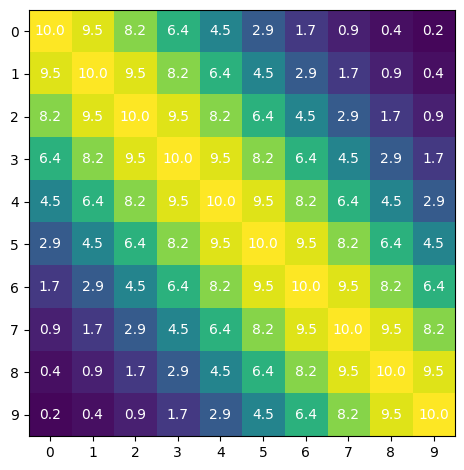

In [189]:
make_covariance_heatmap(10, RBF(10,10).k, savename='rbf10cov.png')

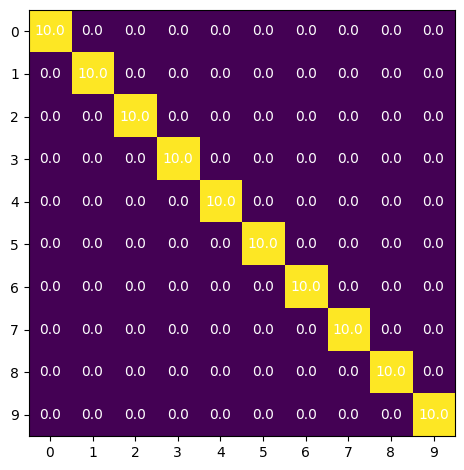

In [190]:
make_covariance_heatmap(10, 'identity', savename='identity10cov.png')

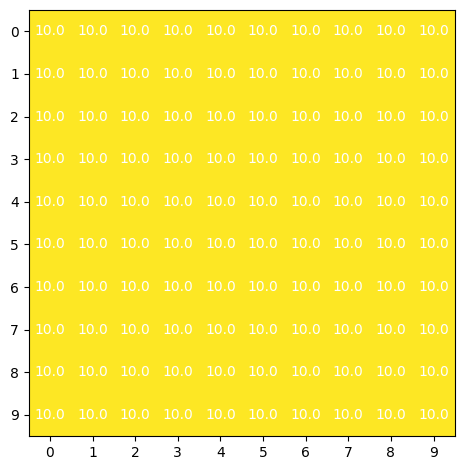

In [191]:
make_covariance_heatmap(10, 'ones', savename='ones10cov.png')

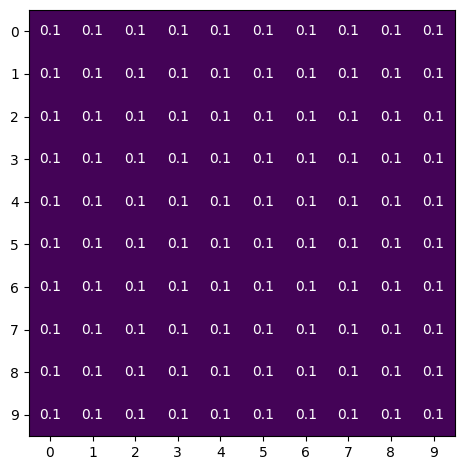

In [14]:
make_covariance_heatmap(10, 'ones')

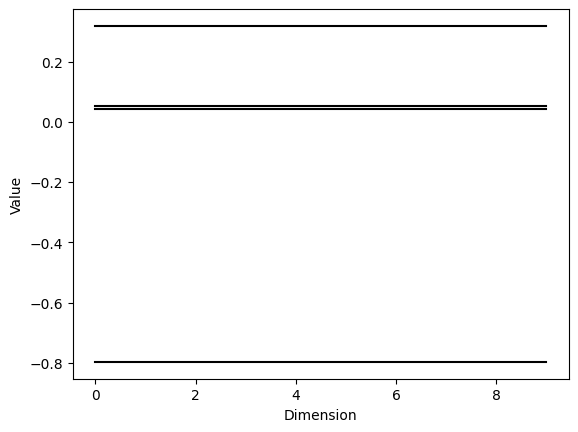

In [16]:
make_sample_plot(10, 4,'ones', savename=None)